In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import joblib
import streamlit
import datetime

In [3]:
df = pd.read_csv('KidneyData.csv')

In [4]:
df

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,image_id,path,diag,target,Class
0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...
12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [10]:
df.path[0]

'/content/data/CT KIDNEY DATASET Normal, CYST, TUMOR and STONE/TUMOR/Tumor- (1044).jpg'

In [12]:
df['path'] = df['path'].str.strip()

In [13]:
df

,image_id,path,diag,target,Class
0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...
12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [14]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=42)

In [18]:
base_dir = '/Users/rithickchandranramesh/PyCharmProjects/kidney_disease_classification/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

df['path'] = df['path'].apply(lambda x: os.path.join(base_dir, os.path.basename(x)))

In [23]:
df.head()

,image_id,path,diag,target,Class
0,Tumor- (1044),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor
1,Tumor- (83),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor
2,Tumor- (580),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor
3,Tumor- (1701),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor
4,Tumor- (1220),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor


In [24]:
df.isna().sum()

image_id    0
path        0
diag        0
target      0
Class       0
dtype: int64

In [26]:
import os

# Check how many files exist
df['valid'] = df['path'].apply(os.path.exists)
print(df['valid'].value_counts())

# Show a few invalid ones
print(df[~df['valid']]['path'].head())

valid
False    12446
Name: count, dtype: int64
0    /Users/rithickchandranramesh/PyCharmProjects/k...
1    /Users/rithickchandranramesh/PyCharmProjects/k...
2    /Users/rithickchandranramesh/PyCharmProjects/k...
3    /Users/rithickchandranramesh/PyCharmProjects/k...
4    /Users/rithickchandranramesh/PyCharmProjects/k...
Name: path, dtype: object


In [27]:
df.shape

(12446, 6)

In [31]:
train_df, val_df = train_test_split(df[df['valid']], test_size=0.2, stratify=df['Class'], random_state=42)

In [28]:
import os

# Define base folder where images are stored
base_path = "/Users/rithickchandranramesh/PyCharmProjects/kidney_disease_classification/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

# Make sure the Class column is clean
df['Class'] = df['Class'].str.strip()

# Get just the filename (in case 'path' has full/relative junk)
df['filename'] = df['path'].apply(lambda x: os.path.basename(x))

# Now create full path: base_path/Class/filename
df['path'] = df.apply(lambda row: os.path.join(base_path, row['Class'], row['filename']), axis=1)

# Re-check validity
df['valid'] = df['path'].apply(os.path.exists)
print(df['valid'].value_counts())

# Optional: see first few valid paths
print(df[df['valid']].head())

valid
True    12446
Name: count, dtype: int64
        image_id                                               path   diag  \
0  Tumor- (1044)  /Users/rithickchandranramesh/PyCharmProjects/k...  Tumor   
1    Tumor- (83)  /Users/rithickchandranramesh/PyCharmProjects/k...  Tumor   
2   Tumor- (580)  /Users/rithickchandranramesh/PyCharmProjects/k...  Tumor   
3  Tumor- (1701)  /Users/rithickchandranramesh/PyCharmProjects/k...  Tumor   
4  Tumor- (1220)  /Users/rithickchandranramesh/PyCharmProjects/k...  Tumor   

   target  Class  valid           filename  
0       3  Tumor   True  Tumor- (1044).jpg  
1       3  Tumor   True    Tumor- (83).jpg  
2       3  Tumor   True   Tumor- (580).jpg  
3       3  Tumor   True  Tumor- (1701).jpg  
4       3  Tumor   True  Tumor- (1220).jpg  


In [29]:
df

,image_id,path,diag,target,Class,valid,filename
0,Tumor- (1044),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor,True,Tumor- (1044).jpg
1,Tumor- (83),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor,True,Tumor- (83).jpg
2,Tumor- (580),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor,True,Tumor- (580).jpg
3,Tumor- (1701),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor,True,Tumor- (1701).jpg
4,Tumor- (1220),/Users/rithickchandranramesh/PyCharmProjects/k...,Tumor,3,Tumor,True,Tumor- (1220).jpg
...,...,...,...,...,...,...,...
12441,Cyst- (2522),/Users/rithickchandranramesh/PyCharmProjects/k...,Cyst,0,Cyst,True,Cyst- (2522).jpg
12442,Cyst- (2627),/Users/rithickchandranramesh/PyCharmProjects/k...,Cyst,0,Cyst,True,Cyst- (2627).jpg
12443,Cyst- (972),/Users/rithickchandranramesh/PyCharmProjects/k...,Cyst,0,Cyst,True,Cyst- (972).jpg
12444,Cyst- (2323),/Users/rithickchandranramesh/PyCharmProjects/k...,Cyst,0,Cyst,True,Cyst- (2323).jpg


In [32]:
img_height, img_width = 128, 128  # Standard image size

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='Class',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 9956 validated image filenames belonging to 4 classes.


In [33]:
val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='Class',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2490 validated image filenames belonging to 4 classes.


In [37]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [43]:
num_classes = len(train_gen.class_indices)

model = Sequential([
    Input(shape=(img_height, img_width, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
early_stopping = EarlyStopping(
    monitor='val_loss',       # You can also use 'val_accuracy'
    patience=3,               # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Roll back to best model weights
)

In [48]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[tensorboard_callback, early_stopping]
)

/Users/rithickchandranramesh/PycharmProjects/kidney_disease_classification/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.7471 - loss: 0.6519 - val_accuracy: 0.9976 - val_loss: 0.0140
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 165ms/step - accuracy: 0.9856 - loss: 0.0423 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 165ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9992 - val_loss: 0.0022
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - accuracy: 0.9976 - loss: 0.0077 - val_accuracy: 0.9992 - val_loss: 0.0023


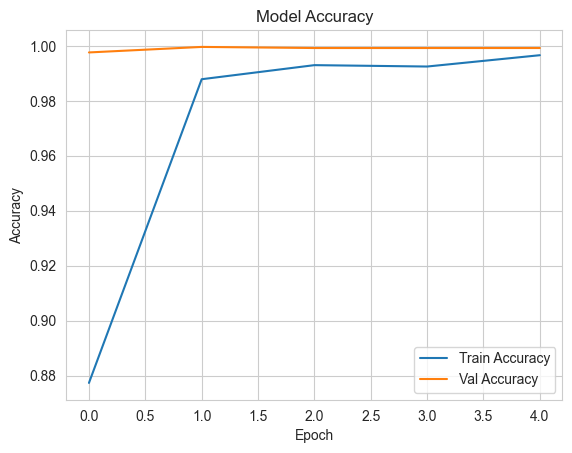

In [49]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

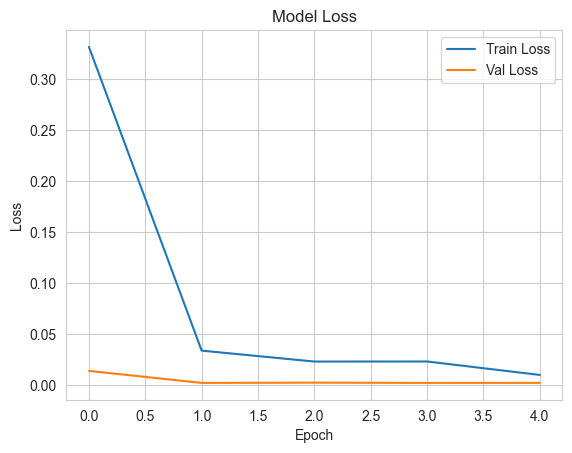

In [50]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.save('kidney_disease_classification_model.h5')

In [58]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
TEST_FOLDER = '/Users/rithickchandranramesh/PycharmProjects/kidney_disease_classification/test'  # <-- Update this
CLASS_NAMES = ['Cyst', 'Normal', 'Stone', 'Tumor']  # Matches label indices: 0,1,2,3

# Loop through images in the test folder
for filename in os.listdir(TEST_FOLDER):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(TEST_FOLDER, filename)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0

        # Predict
        predictions = model.predict(img_array)
        predicted_index = np.argmax(predictions)
        predicted_class = CLASS_NAMES[predicted_index]
        confidence = np.max(predictions)

        print(f"{filename} ➜ Predicted: {predicted_class} (Label Index: {predicted_index}, Confidence: {confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
t2.jpg ➜ Predicted: Tumor (Label Index: 3, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
n.jpg ➜ Predicted: Normal (Label Index: 1, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
s2.jpg ➜ Predicted: Stone (Label Index: 2, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
c.jpg ➜ Predicted: Cyst (Label Index: 0, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
t.jpg ➜ Predicted: Tumor (Label Index: 3, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
c2.jpg ➜ Predicted: Cyst (Label Index: 0, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
s.jpg ➜ Predicted: Stone (Label Index: 2, Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
n2.jpg ➜ Predicted: Normal (Label Index: 1, Confidence: 1.00)


In [59]:
%load_ext tensorboard

In [61]:

%tensorboard --logdir logs/fit

Launching TensorBoard...